# Sortieralgorithmen

Ich habe mich neulich gefragt, was es für gängige Sortieralgorithmen gibt. Wie funktionieren sie? Wie schnell sind sie? Gibt es koriose Algorithmen usw.
Was ich dabei gelernt habe, möchte ich hier teilen. Ich werde verschiedene Algorithmen in Python umsetzen und versuchen den Vorgang grafisch darszustellen.
Dazu brauche ich zunächst einen Datensatz.

## Der zu sortierende Datensatz

Es wird ein einfacher Datensatz sein, den man hoffentlich gut visualisieren kann. Und zwar eine gewisse Anzahl von Integerwerten, die jedes Mal gleich randomisiert sein sollten.

In [1]:
# Zunächst werden alle benötigten Bibliotheken importiert
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm
import os
import time

In [2]:
# Anzahl der ELemente im Datensatz
n = 10

# Random Seed setzen
random.seed(42)

# Datensatz generieren
dataset = random.sample(range(1, n+1), n)

Dann definieren eine Funktion die wir noch häufiger einsetzen werden, um das Sortieren zu visualisieren.

In [3]:
# Farbverlaufsfunktion
cmap = cm.get_cmap('YlGnBu')  # Farbverlauf von Gelb über Grün zu Blau

# Funktion zum Aktualisieren des Balkendiagramms
def update_chart(data, iteration, folder_name, name = "Dataset"):
    i = len(data)
    colors = [cmap(x/i) for x in data]
    plt.bar(range(i), data, color=colors)
    plt.xlabel('Index')
    plt.ylabel('Wert')
    
    if not os.path.exists(folder_name):
      os.makedirs(folder_name)

    if name == "Start":
      plt.title(f'Startkonfiguration')
      plt.savefig(f'{folder_name}/{name}.png')
    else:
      plt.title(f'Sortierung {name} - Schritt {iteration}')
      plt.savefig(f'{folder_name}/{name}_Iteration_{iteration:02d}.png')  # Speichere den Plot als PNG-Datei
    
    plt.close()

C:\Users\gutsc\AppData\Local\Temp\ipykernel_20520\3431035870.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlGnBu')  # Farbverlauf von Gelb über Grün zu Blau


In [4]:
update_chart(dataset, 1, "Sortieralgorithmen", "Start")

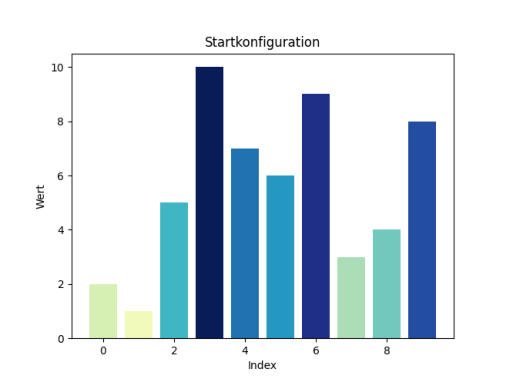

In [5]:

# Load the image
image = plt.imread('Sortieralgorithmen/Start.png')

# Show the image
plt.imshow(image)
plt.axis('off')
plt.show()

## Sortieralgorithmen

### Bubble Sort

**Bubble Sort**: Der Bubble Sort Algorithmus vergleicht zunächst das erste Element mit dem nächsten Element und tauscht sie bei Bedarf aus, wenn sie in der falschen Reihenfolge sind. Anschließend vergleicht er das zweite Element mit dem darauffolgenden Element und tauscht sie gegebenenfalls aus. Dieser Vorgang wird fortgesetzt, bis das vorletzte Element mit dem letzten Element verglichen wurde.

Der Algorithmus arbeitet sich in jedem Durchlauf von links nach rechts durch die Liste und tauscht benachbarte Elemente, wenn sie in der falschen Reihenfolge sind. Nach jedem Durchlauf wird das größte Element in der Liste an die richtige Position am Ende verschoben. Dieser Prozess wird so lange wiederholt, bis die gesamte Liste sortiert ist.

Der Name "Bubble Sort" kommt von der Art und Weise, wie die größten Elemente allmählich an das Ende der Liste "aufsteigen", ähnlich wie Luftblasen in Wasser aufsteigen.

In [6]:
# Bubble Sort Algorithmus
def bubble_sort(data, ):
    cnt = 0
    sorted_datasets = []
    for i in range(len(data)-1):
        for j in range(len(data)-1-i):
            # Vergleiche benachbarte Elemente und tausche sie, falls sie in der falschen Reihenfolge sind
            if data[j] > data[j+1]:
                data[j], data[j+1] = data[j+1], data[j]
            cnt += 1
            # Speichere den sortierten Datensatz nach jedem Sortierschritt
            sorted_datasets.append(data.copy())
    print(f"Anzahl der Schritte: {cnt}")
    return sorted_datasets

In [7]:
bubble_sorted_datasets = []
bubble_sorted_datasets = bubble_sort(dataset,)

Anzahl der Schritte: 45


In [8]:

# Sortiere den Datensatz mit Bubble Sort
# Zeige den sortierten Datensatz nach jedem Sortierschritt
for i, data in enumerate(bubble_sorted_datasets):
    update_chart(data, i+1, "Sortieralgorithmen/bubble_sort", "Bubble_Sort")

### Insertion Sort

Der Insertion Sort Algorithmus ist ein einfacher Sortieralgorithmus, der durch das Einfügen von Elementen in eine bereits sortierte Teilsequenz eine sortierte Gesamtsequenz aufbaut. Der Algorithmus funktioniert folgendermaßen:

Der erste Schritt besteht darin, das erste Element der Liste als bereits sortierten Teil anzusehen. Das heißt, der Teil, der nur das erste Element enthält, wird als sortiert betrachtet.

Der Algorithmus geht dann das nächste Element in der Liste durch und fügt es an die richtige Position im bereits sortierten Teil ein. Dabei vergleicht es das Element mit den bereits sortierten Elementen und verschiebt größere Elemente nach rechts, um Platz für das neu eingefügte Element zu schaffen.

Dieser Schritt wird für jedes weitere Element wiederholt, bis alle Elemente in die richtige Position eingefügt wurden und die Liste vollständig sortiert ist.

Ein wichtiger Aspekt des Insertion Sort Algorithmus ist, dass er effizient für kleine Listen oder bereits teilweise sortierte Listen ist. Der Algorithmus hat eine Laufzeitkomplexität von O(n^2) im Durchschnitt und im schlimmsten Fall, was bedeutet, dass die Sortierzeit quadratisch mit der Anzahl der Elemente steigt.

Es ist wichtig zu beachten, dass Insertion Sort ein stabil sortierender Algorithmus ist, d.h. Elemente mit dem gleichen Wert bleiben in ihrer relativen Reihenfolge erhalten.

In [9]:
# Erzeuge einen zufälligen Datensatz
dataset = random.sample(range(1, n+1), n)

In [10]:
# Insertion Sort Algorithmus
def insertion_sort(data, ):
    cnt=0
    sorted_datasets = []
    for i in range(1, len(data)):
        key = data[i]  # Das aktuell zu sortierende Element
        j = i - 1
        while j >= 0 and data[j] > key:
            data[j+1] = data[j]  # Verschiebe Elemente nach rechts
            j -= 1
            cnt += 1
            # Speichere den sortierten Datensatz nach jedem Sortierschritt
            sorted_datasets.append(data.copy())
        data[j+1] = key  # Füge das Element an der richtigen Position ein
        
    print(f"Anzahl der Schritte: {cnt}")
    return sorted_datasets

In [11]:
insertion_sorted_datasets = []
insertion_sorted_datasets = insertion_sort(dataset)

Anzahl der Schritte: 22


In [12]:

# Sortiere den Datensatz mit Bubble Sort
# Zeige den sortierten Datensatz nach jedem Sortierschritt
for i, data in enumerate(insertion_sorted_datasets):
    update_chart(data, i+1, "Sortieralgorithmen/insertion_sort", "Insertion_Sort")

### Selection Sort

In [13]:
# Erzeuge einen zufälligen Datensatz
dataset = random.sample(range(1, n+1), n)

In [14]:
def selection_sort(data):
    cnt = 0
    sorted_datasets = []
    for i in range(len(data)-1):
        min_index = i
        for j in range(i+1, len(data)):
            if data[j] < data[min_index]:
                min_index = j
                cnt += 1
                sorted_datasets.append(data.copy())
        data[i], data[min_index] = data[min_index], data[i]
        
    print(f"Anzahl der Schritte: {cnt}")
    return sorted_datasets

In [15]:
selection_sorted_datasets = []
selection_sorted_datasets = selection_sort(dataset)

Anzahl der Schritte: 14


In [16]:
# Sortiere den Datensatz mit Bubble Sort
# Zeige den sortierten Datensatz nach jedem Sortierschritt
for i, data in enumerate(selection_sorted_datasets):
    update_chart(data, i+1, "Sortieralgorithmen/selection_sort", "Selection_Sort")

### Merge Sort

In [17]:
# Erzeuge einen zufälligen Datensatz
dataset = random.sample(range(1, n+1), n)

In [18]:
def merge_sort(data):
    steps = []

    def merge(left, right, start):
        result = []
        i = j = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1
            data[start:start+len(result)] = result
            steps.append(list(data))
        while i < len(left):
            result.append(left[i])
            i += 1
            data[start:start+len(result)] = result
            steps.append(list(data))
        while j < len(right):
            result.append(right[j])
            j += 1
            data[start:start+len(result)] = result
            steps.append(list(data))
        return result

    def sort(data, start=0):
        if len(data) <= 1:
            return data
        mid = len(data) // 2
        left = data[:mid]
        right = data[mid:]
        return merge(sort(left, start), sort(right, start + mid), start)

    sort(data)
    return steps

In [19]:
merge_sorted_datasets = merge_sort(dataset)

In [20]:
print(merge_sorted_datasets)

[[4, 6, 2, 1, 10, 7, 3, 8, 9, 5], [4, 6, 2, 1, 10, 7, 3, 8, 9, 5], [4, 6, 2, 1, 10, 7, 3, 8, 9, 5], [4, 6, 2, 1, 10, 7, 3, 8, 9, 5], [4, 6, 1, 1, 10, 7, 3, 8, 9, 5], [4, 6, 1, 2, 10, 7, 3, 8, 9, 5], [4, 6, 1, 2, 10, 7, 3, 8, 9, 5], [1, 6, 1, 2, 10, 7, 3, 8, 9, 5], [1, 2, 1, 2, 10, 7, 3, 8, 9, 5], [1, 2, 4, 2, 10, 7, 3, 8, 9, 5], [1, 2, 4, 6, 10, 7, 3, 8, 9, 5], [1, 2, 4, 6, 10, 7, 3, 8, 9, 5], [1, 2, 4, 6, 10, 3, 3, 8, 9, 5], [1, 2, 4, 6, 10, 3, 7, 8, 9, 5], [1, 2, 4, 6, 10, 3, 7, 8, 5, 5], [1, 2, 4, 6, 10, 3, 7, 8, 5, 9], [1, 2, 4, 6, 10, 3, 7, 5, 5, 9], [1, 2, 4, 6, 10, 3, 7, 5, 8, 9], [1, 2, 4, 6, 10, 3, 7, 5, 8, 9], [1, 2, 4, 6, 10, 3, 7, 5, 8, 9], [1, 2, 4, 6, 10, 3, 5, 5, 8, 9], [1, 2, 4, 6, 10, 3, 5, 7, 8, 9], [1, 2, 4, 6, 10, 3, 5, 7, 8, 9], [1, 2, 4, 6, 10, 3, 5, 7, 8, 9], [1, 2, 4, 6, 10, 3, 5, 7, 8, 9], [1, 2, 4, 6, 10, 3, 5, 7, 8, 9], [1, 2, 3, 6, 10, 3, 5, 7, 8, 9], [1, 2, 3, 4, 10, 3, 5, 7, 8, 9], [1, 2, 3, 4, 5, 3, 5, 7, 8, 9], [1, 2, 3, 4, 5, 6, 5, 7, 8, 9], [1, 2, 3, 4

In [21]:
# Sortiere den Datensatz mit Bubble Sort
# Zeige den sortierten Datensatz nach jedem Sortierschritt
for i, data in enumerate(merge_sorted_datasets):
    update_chart(data, i+1, "Sortieralgorithmen/merge_sort", "Merge Sort")

### Quick Sort

In [22]:
# Erzeuge einen zufälligen Datensatz
dataset = random.sample(range(1, n+1), n)

In [23]:
def quick_sort(arr):
    steps = []

    def sort(arr):
        if len(arr) <= 1:
            return arr

        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]

        sorted_left = sort(left)
        sorted_right = sort(right)

        result = sorted_left + middle + sorted_right
        steps.append(result)
        return result

    sort(arr)
    return steps

In [24]:
quick_sorted_datasets = quick_sort(dataset)


In [25]:
print(quick_sorted_datasets)

[[2, 3], [2, 3, 4], [1, 2, 3, 4], [8, 9, 10], [6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]


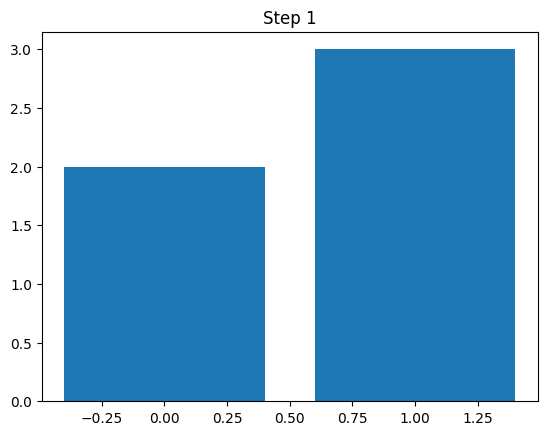

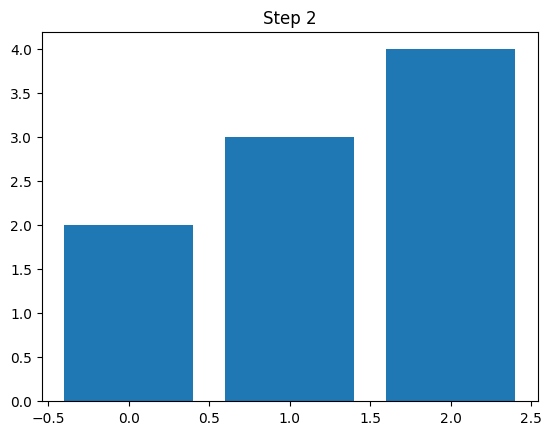

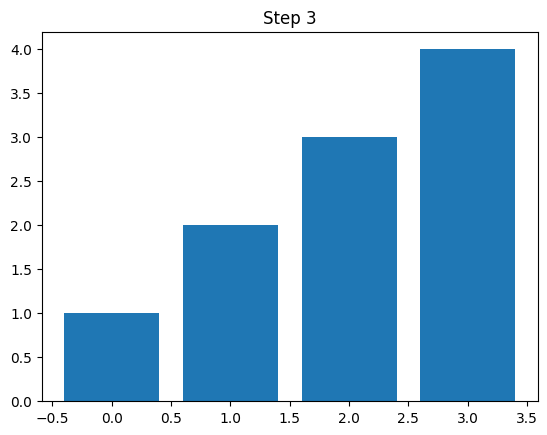

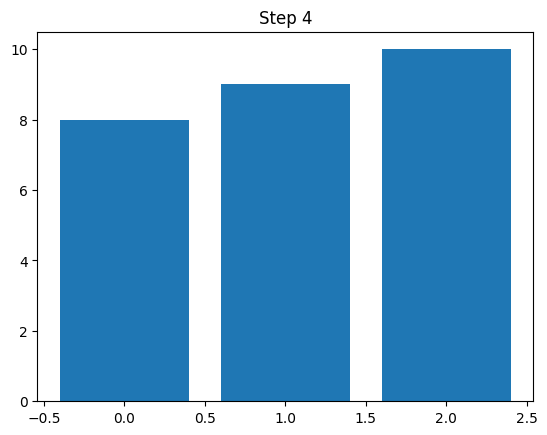

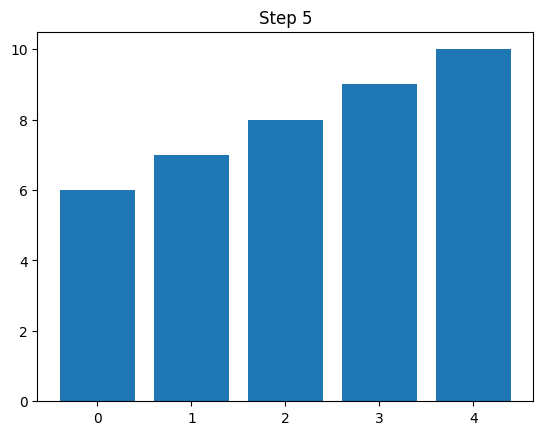

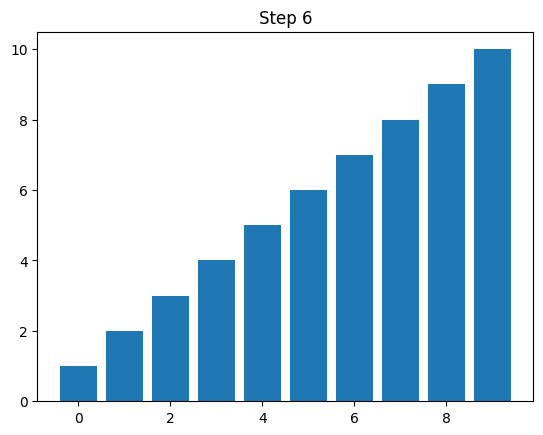

In [26]:
for i, data in enumerate(quick_sorted_datasets):
    plt.figure()
    plt.bar(range(len(data)), data)
    plt.title(f'Step {i+1}')
    plt.show()

### Radix Sort

In [27]:
# Erzeuge einen zufälligen Datensatz
dataset = random.sample(range(1, n+1), n)

In [28]:
def radix_sort(data):
    steps = [list(data)]  # Start with the initial array

    # Find the maximum number to determine the number of digits
    max_num = max(data)
    
    # Perform counting sort for every digit
    exp = 1
    while max_num // exp > 0:
        counting_sort(data, exp)
        steps.append(list(data))  # Add the current state of the array to the steps
        exp *= 10
    
    return steps

def counting_sort(data, exp):
    n = len(data)
    output = [0] * n
    count = [0] * 10
    
    # Count the occurrences of each digit
    for i in range(n):
        index = data[i] // exp
        count[index % 10] += 1
    
    # Calculate the cumulative count
    for i in range(1, 10):
        count[i] += count[i - 1]
    
    # Build the output array
    i = n - 1
    while i >= 0:
        index = data[i] // exp
        output[count[index % 10] - 1] = data[i]
        count[index % 10] -= 1
        i -= 1
    
    # Copy the sorted elements back to the original array
    for i in range(n):
        data[i] = output[i]

In [29]:
radix_sorted_datasets = radix_sort(dataset)

In [30]:
radix_sorted_datasets

[[2, 1, 4, 7, 3, 9, 10, 5, 8, 6],
 [10, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [31]:
# Sortiere den Datensatz mit Bubble Sort
# Zeige den sortierten Datensatz nach jedem Sortierschritt
for i, data in enumerate(radix_sorted_datasets):
    update_chart(data, i+1, "Sortieralgorithmen/radix_sort", "Radix Sort")

### Bogo Sort

In [32]:
# Erzeuge einen zufälligen Datensatz
n = 5
dataset = random.sample(range(1, n+1), n)
print(dataset)

[4, 3, 1, 2, 5]


In [33]:
def is_sorted(data):
    for i in range(len(data) - 1):
        if data[i] > data[i+1]:
            return False
    return True

def bogo_sort(data):
    steps = []
    while not is_sorted(data):
        steps.append(list(data))  # Add the current state of the array to the steps
        random.shuffle(data)
    steps.append(list(data))  # Add the final sorted array to the steps
    return steps

In [34]:
bogo_sorted_datasets = bogo_sort(dataset)

In [35]:
bogo_sorted_datasets

[[4, 3, 1, 2, 5], [5, 4, 2, 1, 3], [1, 5, 2, 4, 3], [1, 2, 3, 4, 5]]

In [36]:
# Sortiere den Datensatz mit Bubble Sort
# Zeige den sortierten Datensatz nach jedem Sortierschritt
for i, data in enumerate(bogo_sorted_datasets):
    update_chart(data, i+1, "Sortieralgorithmen/bogo_sort", "Bogo Sort")

### Sleep Sort

In [37]:
# Erzeuge einen zufälligen Datensatz
dataset = random.sample(range(1, n+1), n)

In [38]:
import time
import threading

def sleep_sort(data):
    sorted_data = []
    def sleep_func(x):
        time.sleep(x)
        sorted_data.append(x)
    
    threads = []
    for num in data:
        t = threading.Thread(target=sleep_func, args=(num,))
        threads.append(t)
        t.start()
    
    for t in threads:
        t.join()
    
    return sorted_data

In [39]:
sleep_sorted_datasets = []
sleep_sorted_datasets = sleep_sort(dataset)

In [40]:
# Sortiere den Datensatz mit Bubble Sort
# Zeige den sortierten Datensatz nach jedem Sortierschritt
for i, data in enumerate(sleep_sorted_datasets):
    update_chart(data, i+1, "Sortieralgorithmen/sleep_sort")

TypeError: object of type 'int' has no len()

## Gifs erstellen

In [ ]:
import os
import imageio

In [ ]:
def create_gif_from_pngs(folder_path, output_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            file_path = os.path.join(folder_path, filename)
            images.append(imageio.imread(file_path))
    
    imageio.mimsave(output_path, images, duration=0.5)

In [ ]:
folder_path = "Sortieralgorithmen"
folder_list = [folder for folder in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, folder))]

for folder in folder_list:
    output_path = os.path.join("Sortieralgorithmen", f"{folder}.gif")
    create_gif_from_pngs(os.path.join("Sortieralgorithmen", folder), output_path)


C:\Users\gutsc\AppData\Local\Temp\ipykernel_10876\1581740541.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
